In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and prepare

In [2]:
heat = pd.read_csv('../02-data/data_cleaned_engineered.csv')
#heat = pd.read_csv('../02-data/data_cleaned_engineered_24h.csv')
df = heat.copy()

In [3]:
df.head()

,tstamp,consumed_heat,temp,cloud,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed,lag_24,...,day,month,year,is_weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2012-01-02 00:00:00,16.373093,3.1,100.0,1.0,1.0,0.0,130.0,3.0,21.441080,...,2,1,2012,0,True,False,False,False,False,False
1,2012-01-02 01:00:00,15.306093,3.4,100.0,1.0,1.0,0.0,170.0,3.0,21.636080,...,2,1,2012,0,True,False,False,False,False,False
2,2012-01-02 02:00:00,14.863093,3.9,100.0,1.0,1.0,0.0,160.0,3.0,21.195580,...,2,1,2012,0,True,False,False,False,False,False
3,2012-01-02 03:00:00,14.246093,3.9,100.0,1.0,1.0,0.0,140.0,2.0,20.775913,...,2,1,2012,0,True,False,False,False,False,False
4,2012-01-02 04:00:00,14.297093,4.3,100.0,1.0,1.0,0.0,150.0,4.0,20.453913,...,2,1,2012,0,True,False,False,False,False,False


In [4]:
df['tstamp'] = pd.to_datetime(df['tstamp'], format='%Y-%m-%d %H:%M:%S') 
df = df.set_index('tstamp').sort_index()

df.head()

,consumed_heat,temp,cloud,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed,lag_24,hour,day,month,year,is_weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
tstamp,,,,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00,16.373093,3.1,100.0,1.0,1.0,0.0,130.0,3.0,21.441080,0,2,1,2012,0,True,False,False,False,False,False
2012-01-02 01:00:00,15.306093,3.4,100.0,1.0,1.0,0.0,170.0,3.0,21.636080,1,2,1,2012,0,True,False,False,False,False,False
2012-01-02 02:00:00,14.863093,3.9,100.0,1.0,1.0,0.0,160.0,3.0,21.195580,2,2,1,2012,0,True,False,False,False,False,False
2012-01-02 03:00:00,14.246093,3.9,100.0,1.0,1.0,0.0,140.0,2.0,20.775913,3,2,1,2012,0,True,False,False,False,False,False
2012-01-02 04:00:00,14.297093,4.3,100.0,1.0,1.0,0.0,150.0,4.0,20.453913,4,2,1,2012,0,True,False,False,False,False,False


In [5]:
columns_with_nans = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print(columns_with_nans)
df = df.dropna(subset=columns_with_nans)

[]


In [6]:
df.shape

(64610, 20)

In [67]:
features = [col for col in df.columns if col != 'consumed_heat']
target = 'consumed_heat'

print("Features: ", features)
print("Target: ", target)

Features:  ['temp', 'cloud', 'holiday_in_general', 'school_holiday_period', 'public_holiday_period', 'wind_direction', 'wind_speed', 'lag_24', 'hour', 'day', 'month', 'year', 'is_weekend', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday']
Target:  consumed_heat


In [8]:
df.head(3)

,consumed_heat,temp,cloud,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed,lag_24,hour,day,month,year,is_weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
tstamp,,,,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00,16.373093,3.1,100.0,1.0,1.0,0.0,130.0,3.0,21.44108,0,2,1,2012,0,True,False,False,False,False,False
2012-01-02 01:00:00,15.306093,3.4,100.0,1.0,1.0,0.0,170.0,3.0,21.63608,1,2,1,2012,0,True,False,False,False,False,False
2012-01-02 02:00:00,14.863093,3.9,100.0,1.0,1.0,0.0,160.0,3.0,21.19558,2,2,1,2012,0,True,False,False,False,False,False


In [9]:
tmin = df.index.min()
tmax = df.index.max()
print("time range: ", tmin, tmax)

time range:  2012-01-02 00:00:00 2019-05-31 23:00:00


## Split the dataset

In [10]:
# Train-test split 
date_i_test = "2019-01-01 00:00:00"
#split_idx = int(df.shape[0]*0.8) # index at 80% of the entries

"""
train = df.iloc[:split_idx] # 80% of the entries
test = df.iloc[split_idx:] # 20% of the entries
"""
# split in train and validation
train = df.loc[df.index < date_i_test] # all entries before Feb 2019

# test dataset
test = df.loc[df.index >= date_i_test] # from first week of Feb 2019

print(f"Train data: {train.shape}, from {train.index.min()} to {train.index.max()}")
print(f"Test data: {test.shape} from {test.index.min()}")


Train data: (60989, 20), from 2012-01-02 00:00:00 to 2018-12-31 23:00:00
Test data: (3621, 20) from 2019-01-01 00:00:00


In [68]:
3621/60989

0.059371362048894066

In [163]:
test.index.min(), test.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-05-31 23:00:00'))

In [12]:
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


# Train the model

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
# hyperparametrs chosen with a quick grid search
# Best params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5}

model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

pred = model.predict(X_test)


## Evaluation

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

avg_demand = y_test.mean()
rel_error = mae / avg_demand

mape = np.mean(np.abs((y_test - pred) / y_test)) * 100


print(f"Mean absolute error MAE \t {mae:.2f}  kWh")
print(f"Root mean squared error RMSE\t {rmse:.2f}")
print(f"Mean squared error MSE\t\t {mse:.2f}")
print(f"The average demand is\t\t {avg_demand:.1f} kWh")
print(f"The relative error is\t\t {rel_error*100:.2f}%")
print(f"MAPE\t\t\t\t {mape:.2f}%")

Mean absolute error MAE 	 0.61  kWh
Root mean squared error RMSE	 0.80
Mean squared error MSE		 0.64
The average demand is		 15.2 kWh
The relative error is		 4.01%
MAPE				 4.77%


**Observations:**
- MAE = 0.61 On average, the hourly forecast is off by 0.61 kWh (it seems to be too little)
- RMSE = 0.80 is the standard 
- The prediction is on average off by 4% (relative error and MAPE).
- I think this is a pretty good result considering the simplicity of the model.

Text(0.5, 0, 'Time stamp')

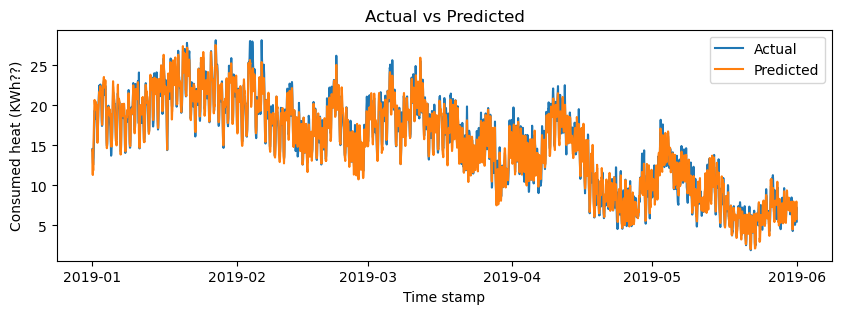

In [23]:
plt.figure(figsize=(10,3))
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.ylabel("Consumed heat (KWh??)")
plt.xlabel("Time stamp")


**Error over time**

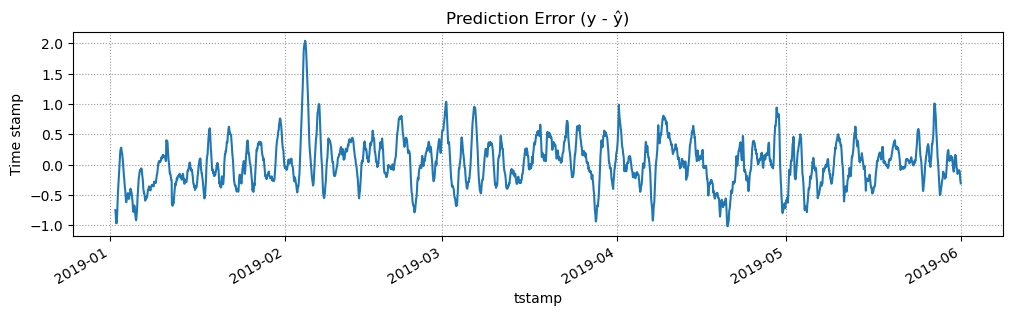

In [24]:
error = y_test - pred
error.rolling(24).mean().plot(figsize=(12,3), title="Prediction Error (y - ŷ)")
plt.ylabel("Error")
plt.ylabel("Time stamp")
plt.grid(ls=':', alpha=0.8, c='gray')

Model Evaluation Summary
-----------------------------------
MAE  : 0.61
RMSE : 0.80
MSE  : 0.64
MAPE : 4.77%
Average demand: 15.16
Relative MAE (MAE / avg demand): 4.01%


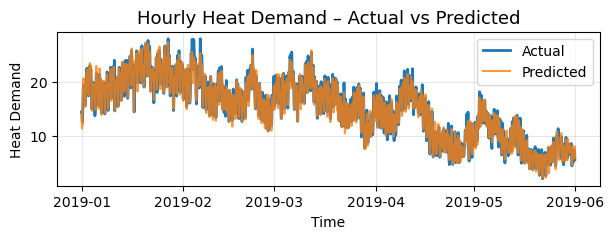

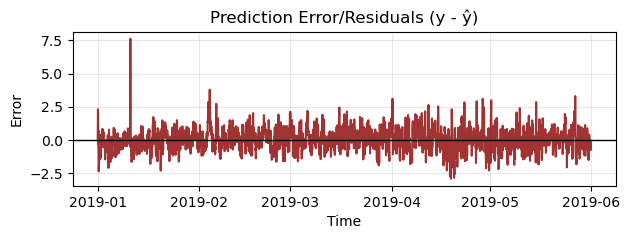

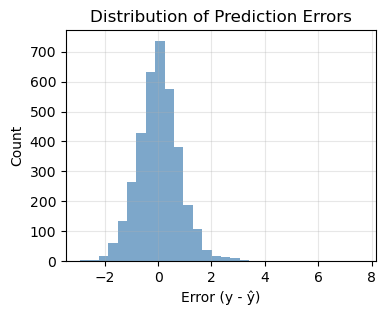

In [29]:
# --- Summary printout ---
print("Model Evaluation Summary")
print("-" * 35)
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"Average demand: {avg_demand:.2f}")
print(f"Relative MAE (MAE / avg demand): {mae / avg_demand:.2%}")

# --- Actual vs Predicted ---
plt.figure(figsize=(7,2))
plt.plot(y_test.index, y_test, label="Actual", linewidth=2)
plt.plot(y_test.index, pred, label="Predicted", linestyle='-', alpha=0.8)
plt.title("Hourly Heat Demand – Actual vs Predicted", fontsize=13)
plt.xlabel("Time")
plt.ylabel("Heat Demand")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Residuals plot ---
#residuals = y_test - pred
plt.figure(figsize=(7,2))
plt.plot(y_test.index, error, color='darkred', alpha=0.8)
plt.axhline(0, color='black', linewidth=1)
plt.title("Prediction Error/Residuals (y - ŷ)")
plt.xlabel("Time")
plt.ylabel("Error")
plt.grid(alpha=0.3)
plt.show()

# --- Optional: Residual distribution ---
plt.figure(figsize=(4,3))
plt.hist(error, bins=30, color='steelblue', alpha=0.7)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (y - ŷ)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

The model predicts hourly heat demand with an average absolute error of 0.45, corresponding to roughly 3.4% of typical hourly consumption (????).
The relatively small gap between MAE (0.45) and RMSE (0.61) indicates that the model rarely produces large outliers, its performance is consistent across time.
With a MAPE of 3.4%, predictions are within a ±3-4% margin of actual values, which is a strong baseline for short-term demand forecasting in energy applications.

- <5% error → operationally accurate enough for day-ahead planning
- Errors are stable and not dominated by extreme misses
- Good first prototype: especially without extensive feature tuning and feature engineering.

### Inspect outlier

In [174]:
residuals = y_test - pred

In [175]:
res_threshold = 3
outliers_ind = residuals[(residuals.values > res_threshold) | (residuals.values < -res_threshold)].index
outliers_ind.shape

(69,)

In [176]:
features_to_compare = ['temp', 'wind_speed', 'cloud'] # Adjust as needed
overall_mean = X_test[features_to_compare].mean()
outliers_events = X_test.loc[outliers_ind]
outliers_events.head()

,temp,cloud,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed,lag_24,hour,day,month,year,is_weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
tstamp,,,,,,,,,,,,,,,,,,,
2019-01-01 07:00:00,5.3,44.166667,1.0,1.0,1.0,260.0,6.0,18.648,7,1,1,2019,0,False,False,False,False,True,False
2019-01-01 08:00:00,4.7,50.333333,1.0,1.0,1.0,260.0,5.0,20.032,8,1,1,2019,0,False,False,False,False,True,False
2019-01-01 09:00:00,4.2,56.500000,1.0,1.0,1.0,270.0,5.0,21.658,9,1,1,2019,0,False,False,False,False,True,False
2019-01-11 00:00:00,0.3,100.000000,0.0,0.0,0.0,210.0,3.0,17.427,0,11,1,2019,0,False,False,False,False,False,False
2019-01-12 00:00:00,0.9,62.500000,0.0,0.0,0.0,290.0,6.0,24.113,0,12,1,2019,1,False,True,False,False,False,False


In [177]:
comparison_df = outliers_events[features_to_compare]
comparison_df.loc['overall_mean'] = overall_mean

/var/folders/8v/xpvjr2rd5h37bdb655bsyz1r0000gp/T/ipykernel_46876/1639015692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df.loc['overall_mean'] = overall_mean


In [178]:
print(comparison_df.round(2)) # .round(2) for cleaner output

                      temp  wind_speed   cloud
tstamp                                        
2019-01-01 07:00:00   5.30        6.00   44.17
2019-01-01 08:00:00   4.70        5.00   50.33
2019-01-01 09:00:00   4.20        5.00   56.50
2019-01-11 00:00:00   0.30        3.00  100.00
2019-01-12 00:00:00   0.90        6.00   62.50
...                    ...         ...     ...
2019-05-27 04:00:00   8.90        1.00   56.33
2019-05-27 05:00:00  10.90        1.00   53.17
2019-05-27 10:00:00  12.10        4.00   83.33
2019-05-27 13:00:00  11.60        4.00   98.00
overall_mean          3.78        3.28   65.39

[70 rows x 3 columns]


To get meaninful info I'd need to compare it with seasonal data.

# Final demonstration

In [179]:
df.head(3)

,consumed_heat,temp,cloud,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed,lag_24,hour,day,month,year,is_weekend,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
tstamp,,,,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00,16.373093,3.1,100.0,1.0,1.0,0.0,130.0,3.0,21.44108,0,2,1,2012,0,True,False,False,False,False,False
2012-01-02 01:00:00,15.306093,3.4,100.0,1.0,1.0,0.0,170.0,3.0,21.63608,1,2,1,2012,0,True,False,False,False,False,False
2012-01-02 02:00:00,14.863093,3.9,100.0,1.0,1.0,0.0,160.0,3.0,21.19558,2,2,1,2012,0,True,False,False,False,False,False


In [180]:
target

'consumed_heat'

### One day

In [31]:
start_date = '2019-02-01 00:00:00'
end_date = '2019-02-01 23:00:00'

test = df.loc[(df.index >= start_date) & (df.index <= end_date)]
X_test = test[features]
y_test = test[target]

y_pred = model.predict(X_test)

In [43]:
import matplotlib.dates as mdates # Import the dates module


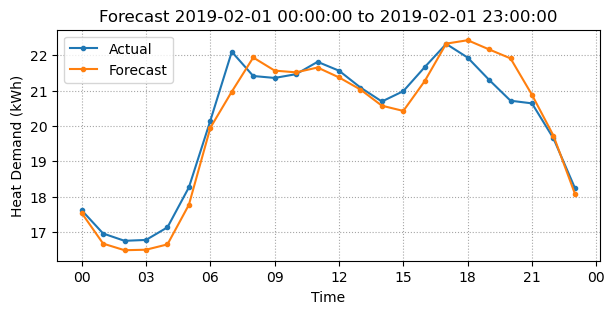

In [51]:
plt.figure(figsize=(7,3))
plt.plot(y_test, label='Actual', marker='o', ms=3)
y_plot = pd.Series(y_pred, index=X_test.index)
plt.plot(y_plot, label='Forecast', ls='-', marker='o', ms=3)
plt.legend()
plt.ylabel("Heat Demand (kWh)")
plt.xlabel("Time")
plt.grid(ls=':', c='gray', alpha=0.7)
plt.title(f"Forecast {start_date} to {end_date}")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.setp(ax.get_xticklabels(), rotation=0)

plt.show()


## One week

In [52]:
start_date = '2019-02-01 00:00:00'
end_date = '2019-02-07 23:00:00'

test = df.loc[(df.index >= start_date) & (df.index <= end_date)]
X_test = test[features]
y_test = test[target]

y_pred = model.predict(X_test)

In [65]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

avg_demand = y_test.mean()
rel_error = mae / avg_demand

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print(f"Mean absolute error MAE \t {mae:.2f}  kWh")
print(f"Root mean squared error RMSE\t {rmse:.2f}")
print(f"Mean squared error MSE\t\t {mse:.2f}")
print(f"The average demand is\t\t {avg_demand:.1f} kWh")
print(f"The relative error is\t\t {rel_error*100:.2f}%")
print(f"MAPE\t\t\t\t {mape:.2f}%")

Mean absolute error MAE 	 0.76  kWh
Root mean squared error RMSE	 1.08
Mean squared error MSE		 1.18
The average demand is		 21.0 kWh
The relative error is		 3.64%
MAPE				 3.40%


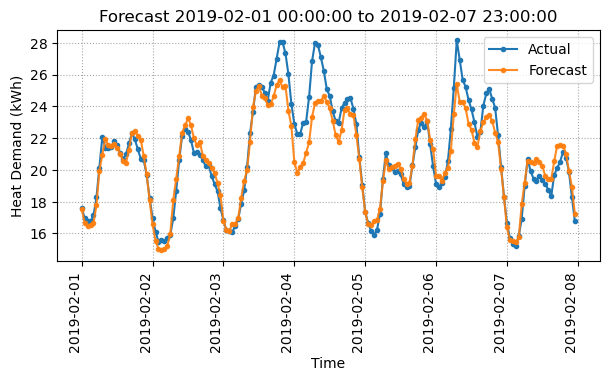

In [62]:
plt.figure(figsize=(7,3))
plt.plot(y_test, label='Actual', marker='o', ms=3)
y_plot = pd.Series(y_pred, index=X_test.index)
plt.plot(y_plot, label='Forecast', ls='-', marker='o', ms=3, alpha=0.9)
plt.legend()
plt.ylabel("Heat Demand (kWh)")
plt.xlabel("Time")
plt.grid(ls=':', c='gray', alpha=0.7)
plt.title(f"Forecast {start_date} to {end_date}")


ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

## Nest Steps to Improve:

- Add lag_1 as the previously predicted value. 
- Adding other lag interactions (e.g., previous temperature × time of day)
- Add temperature error if we take the "future values" from weather forecasts.
- split in train/val/test to tune hyperparameters
- Testing LightGBM or XGBoost with feature importance analysis to identify key drivers of demand

# With validation set

In [185]:
from sklearn.metrics import r2_score

In [186]:
# Train-test split 
date_i_test = "2019-01-01 00:00:00"

# split in train and validation
train_val = df.loc[df.index < date_i_test] # all entries before Feb 2019
split_idx = int(train_val.shape[0]*0.7) # index at 70% of the entries

train = train_val.iloc[:split_idx] 
val = train_val.iloc[split_idx:] 

print(f"Train data: {train.shape}, from {train.index.min()} to {train.index.max()}")
print(f"Vali data: {val.shape}, from {val.index.min()} to {val.index.max()}")

# test dataset
test = df.loc[df.index >= date_i_test] # from first week of Feb 2019
print(f"Test data: {test.shape} from {test.index.min()}")


Train data: (42692, 20), from 2012-01-02 00:00:00 to 2016-11-27 06:00:00
Vali data: (18297, 20), from 2016-11-27 07:00:00 to 2018-12-31 23:00:00
Test data: (3621, 20) from 2019-01-01 00:00:00


In [187]:
X_train, y_train = train[features], train[target]
X_val, y_val = val[features], val[target]
X_test, y_test = test[features], test[target]


In [188]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'subsample': [0.8, 0.9, 1.0]
}

In [189]:
best_score = float('inf')
best_params = None

# Grid search using validation set
for n_est in param_grid['n_estimators']:
    for lr in param_grid['learning_rate']:
        for depth in param_grid['max_depth']:
            model = GradientBoostingRegressor(
                n_estimators=n_est,
                learning_rate=lr,
                max_depth=depth,
                random_state=42
            )
            
            model.fit(X_train, y_train)
            val_pred = model.predict(X_val)
            val_mse = mean_squared_error(y_val, val_pred)
            
            if val_mse < best_score:
                best_score = val_mse
                best_params = {'n_estimators': n_est, 'learning_rate': lr, 'max_depth': depth}

print(f"Best params: {best_params}")
print(f"Best validation MSE: {best_score}")


Best params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5}
Best validation MSE: 0.5772236621327123


In [ ]:
# Train final model with best params
final_model = GradientBoostingRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)
test_pred = final_model.predict(X_test)

## Use XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, PredefinedSplit

In [ ]:
# Combine train and validation
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])
split_index = [-1] * len(X_train) + [0] * len(X_val)
pds = PredefinedSplit(test_fold=split_index)


- Adding other lag interactions (e.g., previous temperature × time of day)
- split in train/val/test to tune hyperparameters
- Testing LightGBM or XGBoost with feature importance analysis to identify key drivers of demand